# Домашняя работа к лекции «Визуализация данных»

### Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

 - данные приложений из Google Play;
 - данные о видео из трендов YouTube;
 - данные об уровне счастья в разных странах.
 
### Дополнительная часть (необязательная)

- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,5
import seaborn as sns

###  The World Happiness Report

#### Rename
- Страна (Country: Country or region)
- Уровень счастья (Happiness: Happiness Score)
- Экономика (Economy: Economy (GDP per capita))
- Социальная поддержка (Family: Social support)
- Продолжительность жизни (Health: Healthy life expectancy)
- Свобода выбора (Freedom: Freedom to make life choices) 
- Уровень коррупции (Trust: Perceptions of corruption or Government Corruption)

In [2]:
df2015 = pd.read_csv('The_World_Happiness_Report/2015.csv')
df2015['Year'] = 2015
df2015.rename(columns = { 
    df2015.columns[3]: 'Happiness',
    df2015.columns[5]: 'Economy',
    df2015.columns[7]: 'Health',
    df2015.columns[9]: 'Trust',
    df2015.columns[11]: 'Dystopia_Residual',    
}, inplace = True)
df2015['Health'] = round(df2015['Health'] * 100, 1)
df2015 = df2015[['Year', 'Country', 'Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']]
df2015.head()

,Year,Country,Happiness,Economy,Family,Health,Freedom,Trust,Generosity
0,2015,Switzerland,7.587,1.39651,1.34951,94.1,0.66557,0.41978,0.29678
1,2015,Iceland,7.561,1.30232,1.40223,94.8,0.62877,0.14145,0.43630
2,2015,Denmark,7.527,1.32548,1.36058,87.5,0.64938,0.48357,0.34139
3,2015,Norway,7.522,1.45900,1.33095,88.5,0.66973,0.36503,0.34699
4,2015,Canada,7.427,1.32629,1.32261,90.6,0.63297,0.32957,0.45811


In [3]:
df2016 = pd.read_csv('The_World_Happiness_Report/2016.csv')
df2016['Year'] = 2016
df2016.rename(columns = { 
    df2016.columns[3]: 'Happiness',
    df2016.columns[6]: 'Economy',
    df2016.columns[8]: 'Health',
    df2016.columns[10]: 'Trust',
    df2016.columns[12]: 'Dystopia_Residual',    
}, inplace = True)
df2016['Health'] = round(df2016['Health'] * 100, 1)
df2016 = df2016[['Year', 'Country', 'Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']]
df2016.head()

,Year,Country,Happiness,Economy,Family,Health,Freedom,Trust,Generosity
0,2016,Denmark,7.526,1.44178,1.16374,79.5,0.57941,0.44453,0.36171
1,2016,Switzerland,7.509,1.52733,1.14524,86.3,0.58557,0.41203,0.28083
2,2016,Iceland,7.501,1.42666,1.18326,86.7,0.56624,0.14975,0.47678
3,2016,Norway,7.498,1.57744,1.12690,79.6,0.59609,0.35776,0.37895
4,2016,Finland,7.413,1.40598,1.13464,81.1,0.57104,0.41004,0.25492


In [4]:
df2017 = pd.read_csv('The_World_Happiness_Report/2017.csv')
df2017['Year'] = 2017
df2017.rename(columns = { 
    df2017.columns[2]: 'Happiness',
    df2017.columns[5]: 'Economy',
    df2017.columns[7]: 'Health',
    df2017.columns[10]: 'Trust',
    df2017.columns[11]: 'Dystopia_Residual',    
}, inplace = True)
df2017['Health'] = round(df2017['Health'] * 100, 1)
df2017 = df2017[['Year', 'Country', 'Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']]
df2017.head()

,Year,Country,Happiness,Economy,Family,Health,Freedom,Trust,Generosity
0,2017,Norway,7.537,1.616463,1.533524,79.7,0.635423,0.315964,0.362012
1,2017,Denmark,7.522,1.482383,1.551122,79.3,0.626007,0.400770,0.355280
2,2017,Iceland,7.504,1.480633,1.610574,83.4,0.627163,0.153527,0.475540
3,2017,Switzerland,7.494,1.564980,1.516912,85.8,0.620071,0.367007,0.290549
4,2017,Finland,7.469,1.443572,1.540247,80.9,0.617951,0.382612,0.245483


In [5]:
df2018 = pd.read_csv('The_World_Happiness_Report/2018.csv')
df2018['Year'] = 2018
df2018.rename(columns = { 
    df2018.columns[1]: 'Country',
    df2018.columns[2]: 'Happiness',
    df2018.columns[3]: 'Economy',
    df2018.columns[4]: 'Family',
    df2018.columns[5]: 'Health',
    df2018.columns[6]: 'Freedom',
    df2018.columns[8]: 'Trust',    
}, inplace = True)
df2018['Health'] = round(df2018['Health'] * 100, 1)
df2018 = df2018[['Year', 'Country', 'Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']]
df2018.head()

,Year,Country,Happiness,Economy,Family,Health,Freedom,Trust,Generosity
0,2018,Finland,7.632,1.305,1.592,87.4,0.681,0.393,0.202
1,2018,Norway,7.594,1.456,1.582,86.1,0.686,0.340,0.286
2,2018,Denmark,7.555,1.351,1.590,86.8,0.683,0.408,0.284
3,2018,Iceland,7.495,1.343,1.644,91.4,0.677,0.138,0.353
4,2018,Switzerland,7.487,1.420,1.549,92.7,0.660,0.357,0.256


In [6]:
df2019 = pd.read_csv('The_World_Happiness_Report/2019.csv')
df2019['Year'] = 2019
df2019.rename(columns = { 
    df2019.columns[1]: 'Country',
    df2019.columns[2]: 'Happiness',
    df2019.columns[3]: 'Economy',
    df2019.columns[4]: 'Family',
    df2019.columns[5]: 'Health',
    df2019.columns[6]: 'Freedom',
    df2019.columns[8]: 'Trust',    
}, inplace = True)
df2019['Health'] = round(df2019['Health'] * 100, 1)
df2019 = df2019[['Year', 'Country', 'Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']]
df2019.head()

,Year,Country,Happiness,Economy,Family,Health,Freedom,Trust,Generosity
0,2019,Finland,7.769,1.340,1.587,98.6,0.596,0.393,0.153
1,2019,Denmark,7.600,1.383,1.573,99.6,0.592,0.410,0.252
2,2019,Norway,7.554,1.488,1.582,102.8,0.603,0.341,0.271
3,2019,Iceland,7.494,1.380,1.624,102.6,0.591,0.118,0.354
4,2019,Netherlands,7.488,1.396,1.522,99.9,0.557,0.298,0.322


In [7]:
world_happy = pd.concat([df2015, df2016, df2017, df2018, df2019], ignore_index=True)
world_happy['Country'] = world_happy['Country'].replace(['Somaliland Region'], 'Somalia')\
                                               .replace(['Trinidad & Tobago'], 'Trinidad and Tobago')\
                                               .replace(['Northern Cyprus'], 'North Cyprus')\
                                               .replace(['North Macedonia'], 'Macedonia')\
                                               .replace(['Hong Kong S.A.R., China'], 'Hong Kong')\
                                               .replace(['Taiwan Province of China'], 'Taiwan')
world_happy

,Year,Country,Happiness,Economy,Family,Health,Freedom,Trust,Generosity
0,2015,Switzerland,7.587,1.39651,1.34951,94.1,0.66557,0.41978,0.29678
1,2015,Iceland,7.561,1.30232,1.40223,94.8,0.62877,0.14145,0.43630
2,2015,Denmark,7.527,1.32548,1.36058,87.5,0.64938,0.48357,0.34139
3,2015,Norway,7.522,1.45900,1.33095,88.5,0.66973,0.36503,0.34699
4,2015,Canada,7.427,1.32629,1.32261,90.6,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
777,2019,Rwanda,3.334,0.35900,0.71100,61.4,0.55500,0.41100,0.21700
778,2019,Tanzania,3.231,0.47600,0.88500,49.9,0.41700,0.14700,0.27600
779,2019,Afghanistan,3.203,0.35000,0.51700,36.1,0.00000,0.02500,0.15800
780,2019,Central African Republic,3.083,0.02600,0.00000,10.5,0.22500,0.03500,0.23500


In [8]:
# Отавим только те страны, данные по которым есть за все 5 лет (в дальнейшем - "мир")
def counts(country):
    country_counts = {}
    for c in world_happy['Country'].values:
        if c not in country_counts:
            country_counts[c] = 1
        else:
            country_counts[c] += 1
    
    return country_counts.get(country, 0)
world_happy['counts'] = world_happy['Country'].apply(counts)
fltr_world_happy = world_happy[ world_happy['counts'] == 5 ]
fltr_world_happy

,Year,Country,Happiness,Economy,Family,Health,Freedom,Trust,Generosity,counts
0,2015,Switzerland,7.587,1.39651,1.34951,94.1,0.66557,0.41978,0.29678,5
1,2015,Iceland,7.561,1.30232,1.40223,94.8,0.62877,0.14145,0.43630,5
2,2015,Denmark,7.527,1.32548,1.36058,87.5,0.64938,0.48357,0.34139,5
3,2015,Norway,7.522,1.45900,1.33095,88.5,0.66973,0.36503,0.34699,5
4,2015,Canada,7.427,1.32629,1.32261,90.6,0.63297,0.32957,0.45811,5
...,...,...,...,...,...,...,...,...,...,...
775,2019,Malawi,3.410,0.19100,0.56000,49.5,0.44300,0.08900,0.21800,5
776,2019,Yemen,3.380,0.28700,1.16300,46.3,0.14300,0.07700,0.10800,5
777,2019,Rwanda,3.334,0.35900,0.71100,61.4,0.55500,0.41100,0.21700,5
778,2019,Tanzania,3.231,0.47600,0.88500,49.9,0.41700,0.14700,0.27600,5


In [9]:
whm = fltr_world_happy.groupby('Year').mean()[['Happiness']].head()
whm

,Happiness
Year,
2015,5.417733
2016,5.408757
2017,5.420184
2018,5.449844
2019,5.490932


Text(0, 0.5, 'Уровень счастья')

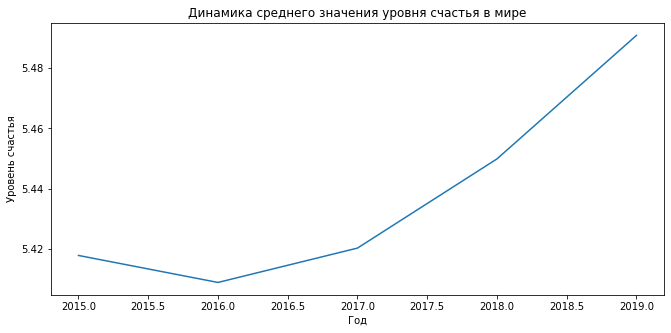

In [10]:
plt.plot(whm.index, whm[['Happiness']])
plt.title('Динамика среднего значения уровня счастья в мире')
plt.xlabel('Год')
plt.ylabel('Уровень счастья')



###### Из графика динамики среднего значения уровня счастья в мире наблюдается спад до 2016г, а потом подъем. Посмотрим на причины, которые повлияли на это.

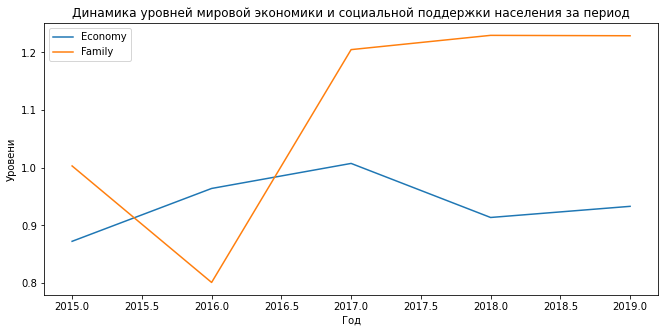

In [11]:
wef = fltr_world_happy.groupby('Year').mean()[['Economy', 'Family']].head()
plt.plot(wef.index, wef[['Economy', 'Family']])
plt.title('Динамика уровней мировой экономики и социальной поддержки населения за период')
plt.xlabel('Год')
plt.ylabel('Уровени')
plt.legend(wef)

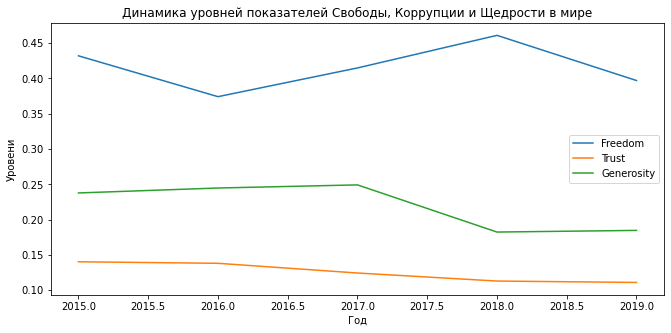

In [12]:
wftg = fltr_world_happy.groupby('Year').mean()[['Freedom', 'Trust', 'Generosity']].head()
plt.plot(wftg.index, wftg[['Freedom', 'Trust', 'Generosity']])
plt.title('Динамика уровней показателей Свободы, Коррупции и Щедрости в мире')
plt.xlabel('Год')
plt.ylabel('Уровени')
plt.legend(wftg)



###### Судя по всему на рост показателей уровня счастья повлияли рост показателей уровней Свободы выбора и Социальной поддержки населения и снижения коррупции.

Text(0, 0.5, 'Возраст')

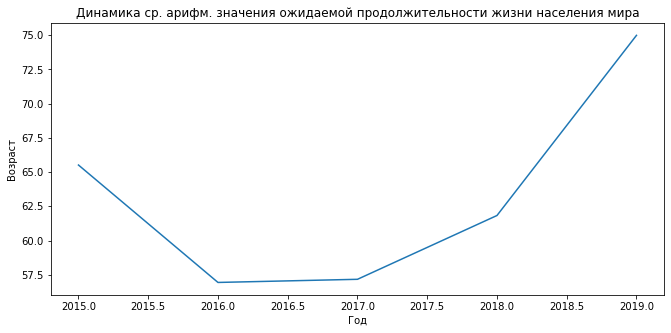

In [13]:
wh = fltr_world_happy.groupby('Year').mean()[['Health']].head()
plt.plot(wh.index, wh[['Health']])
plt.title('Динамика ср. арифм. значения ожидаемой продолжительности жизни населения мира')
plt.xlabel('Год')
plt.ylabel('Возраст')

###### Так же, с 2017г., наблюдается рост ожидаемой продолжительности жизни населения мира, что, осмелюсь предположить, напрямую связано с ростом уровнем счастья.

<AxesSubplot:title={'center':'Correlation between Health and Happiness'}, xlabel='Happiness', ylabel='Health'>

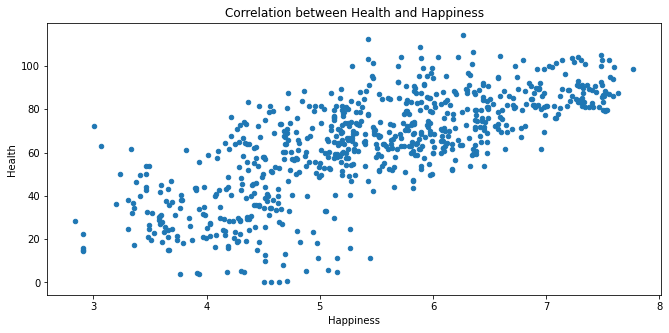

In [14]:
fltr_world_happy.plot(kind='scatter', 
        x='Happiness', 
        y='Health', 
        title='Correlation between Health and Happiness')

<AxesSubplot:title={'center':'Распределение показателей уровня счастья'}, ylabel='Frequency'>

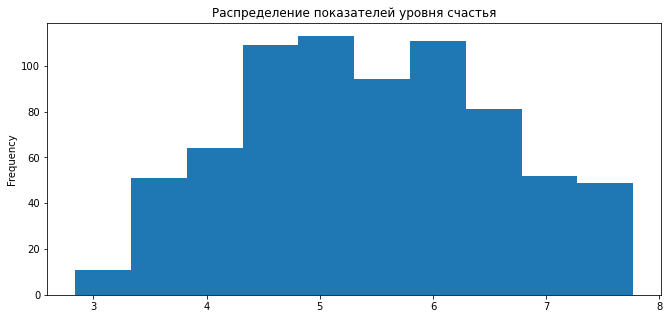

In [15]:
# распределение показателей уровня счастья
fltr_world_happy['Happiness'].plot(kind='hist', 
                                   title='Распределение показателей уровня счастья',
                                   xlabel='Happiness',
                                   ylabel='Country')

Text(0.5, 1.0, 'Happiness distribution')

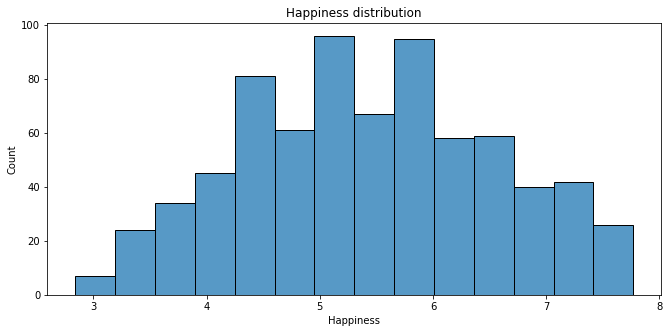

In [16]:
sns.histplot(fltr_world_happy['Happiness'])
plt.title('Happiness distribution')

<AxesSubplot:title={'center':'Распределение показателей ожидаемой продолжительности жизни населения мира'}, ylabel='Frequency'>

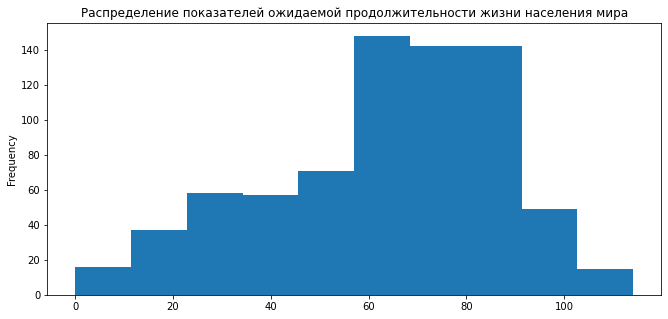

In [17]:
# распределение показателей ожидаемой продолжительности жизни населения мира 
fltr_world_happy['Health'].plot(kind='hist', 
                                title='Распределение показателей ожидаемой продолжительности жизни населения мира',
                                xlabel='Health',
                                ylabel='Country')

<AxesSubplot:title={'center':'Economy & Family distribution'}, ylabel='Frequency'>

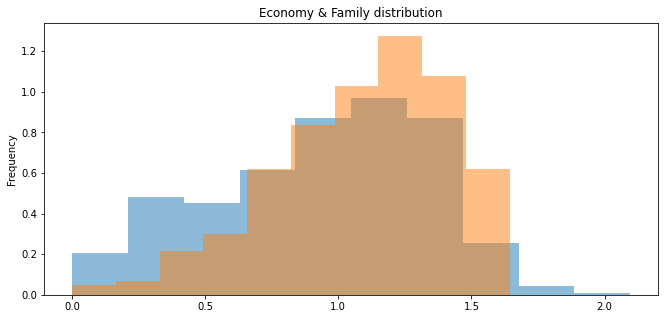

In [18]:
# сравнение распределения показателей экономики и социальной поддержки населения мира
fltr_world_happy.Economy.plot(kind='hist', 
                         title='Economy & Family distribution',
                         xlabel='Economy',
                         ylabel='Country',
                         alpha = 0.5,
                         density = True)

fltr_world_happy.Family.plot(kind='hist', 
                        title='Economy & Family distribution',
                        xlabel='Family',
                        ylabel='Country',
                        alpha = 0.5,
                        density = True)

##### Гипотетически, страны с минимальным уровнем счастья имеют и остальные показатели сравнительно очень низкими. Проверим:

In [19]:
fltr_world_happy.groupby('Country').max()[['Happiness']].sort_values('Happiness', ascending=False).head()

,Happiness
Country,
Finland,7.769
Denmark,7.600
Norway,7.594
Switzerland,7.587
Iceland,7.561


In [20]:
fltr_world_happy.groupby('Country').min()[['Happiness']].sort_values('Happiness', ascending=True).head()

,Happiness
Country,
Togo,2.839
Burundi,2.905
Syria,3.006
Afghanistan,3.203
Tanzania,3.231


In [21]:
contrast_country = fltr_world_happy[ (fltr_world_happy['Country'] == 'Finland') | (fltr_world_happy['Country'] == 'Togo')]
contrast_country = contrast_country[ ['Country', 'Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust'] ].groupby(['Country']).mean()
contrast_country

,Happiness,Economy,Family,Health,Freedom,Trust
Country,,,,,,
Finland,7.5378,1.356960,1.434429,87.38,0.621536,0.398474
Togo,3.5442,0.265871,0.323567,28.84,0.363747,0.100969


<AxesSubplot:title={'center':'Contrast'}, xlabel='Country', ylabel='quantity'>

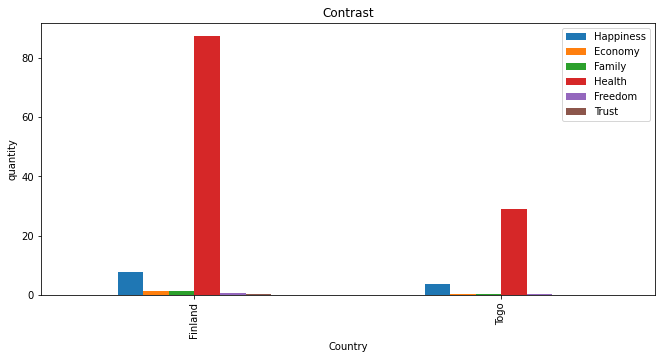

In [22]:
contrast_country.loc[['Finland', 'Togo']].plot(kind='bar', 
                                          title='Contrast',
                                          xlabel='Country',
                                          ylabel='quantity')

##### Видно значительную разницу в показателях продолжительности жизни и уровня счастья. Можно увеличить на графике и сравнить остальные показатели:

In [23]:
contrast_country_ = fltr_world_happy[ (fltr_world_happy['Country'] == 'Finland') | (fltr_world_happy['Country'] == 'Togo')]
contrast_country_ = contrast_country_[ ['Country', 'Economy', 'Family', 'Freedom', 'Trust'] ].groupby(['Country']).mean()
contrast_country_

,Economy,Family,Freedom,Trust
Country,,,,
Finland,1.356960,1.434429,0.621536,0.398474
Togo,0.265871,0.323567,0.363747,0.100969


<AxesSubplot:title={'center':'Contrast'}, xlabel='Country', ylabel='quantity'>

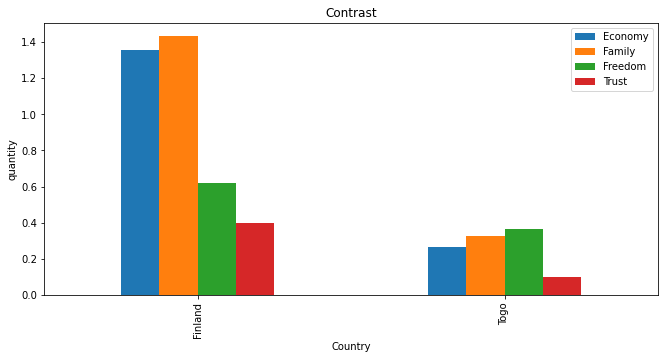

In [24]:
contrast_country_.loc[['Finland', 'Togo']].plot(kind='bar', 
                                           title='Contrast',
                                           xlabel='Country',
                                           ylabel='quantity')

##### Исходя из этой визуализации можно предположить, что уровень социально поддержки населения мира может улучшиться, потому что выбросов не так много. 

<AxesSubplot:title={'center':'Social support'}>

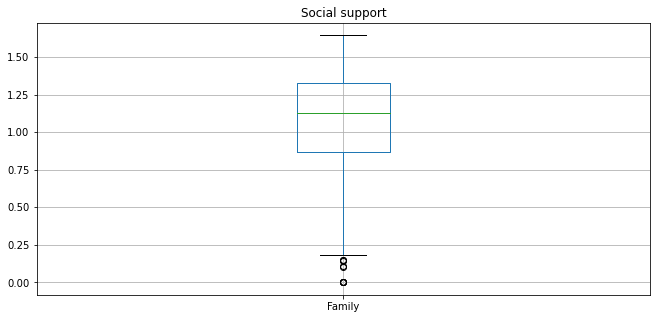

In [25]:
world_happy[['Family']].plot(kind='box',
                             title='Social support', grid=True)

##### На визуализации Government Corruption выбросы в большую сторону от основной статистики. Соответственно это, на мой взгяд, является положительным фактором наблюдения. И можно предположить, что их будет становиться меньше. 

<AxesSubplot:title={'center':'Government Corruption'}>

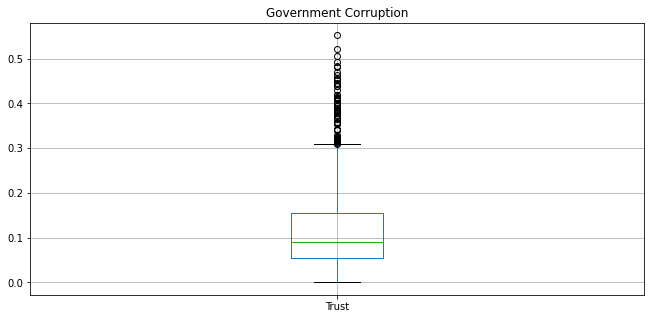

In [26]:
world_happy[['Trust']].plot(kind='box',
                       title='Government Corruption', grid=True)